# Data Parsing and Visualisation 
--- 
This notebook demonstrates how we conduct data parsing and some simple EDA to visualise and analyse the data. 

## Part 1: Data Parsing 
The following is what we have done (in order): 
1. Read in data info csv as info, unzip dataset0.json.gz and read in the json data. 
2. Calculate the mean, median, std, min, max for the length, std and mean of the signal at each of the 3 positions (1-,central, 1+) and save the results into result_df. We have then generated 45 numerical features from our dataset0. 
3. Merged result_df with the label data. The final merged_data df have 121838 rows and 50 columns. 

In [39]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Please modify the datapath based on your local directory 

In [6]:
!gzip -d data/dataset0.json.gz

In [7]:
info = pd.read_csv("data/data.info")

Before you run the following code, run !gzip -d dataset0.json.gz in the terminal to unzip the data file 

In [8]:
data_list = []

with open('data/dataset0.json', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        data_list.append(data)


In [9]:
len(data_list)

121838

In [10]:
list(data_list[1].items())[0][0]

'ENST00000000233'

In [11]:
full = list(data_list[1].items())[0]
list(full[1].items())[0][0]

'261'

In [12]:
full_2 = list(full[1].items())[0]
list(full_2[1].items())[0][0]

'CAAACTG'

In [13]:
full_2 = list(full[1].items())[0]
list(full_2[1].items())[0][1]

[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0.00996, 2.94, 101.0],
 [0.00432, 2.35, 111.0, 0.00559, 2.4, 106.0, 0.00332, 1.39, 94.5],
 [0.00266, 3.81, 108.0, 0.00645, 3.59, 108.0, 0.00827, 2.12, 93.3],
 [0.00498, 2.79, 109.0, 0.0206, 3.68, 111.0, 0.00303, 6.33, 92.4],
 [0.00664, 2.68, 114.0, 0.0104, 2.22, 108.0, 0.00232, 5.59, 89.2],
 [0.00564, 3.19, 108.0, 0.0083, 8.05, 100.0, 0.00744, 2.17, 93.4],
 [0.00797, 2.86, 111.0, 0.00289, 3.25, 109.0, 0.00432, 2.86, 97.7],
 [0.00398, 2.56, 109.0, 0.00232, 2.73, 101.0, 0.0208, 3.22, 94.0],
 [0.0116, 2.42, 110.0, 0.0091, 3.22, 109.0, 0.0113, 2.53, 94.8],
 [0.00797, 4.86, 108.0, 0.00831, 3.07, 110.0, 0.00465, 1.76, 91.8],
 [0.0186, 4.31, 109.0, 0.00232, 1.94, 104.0, 0.0193, 3.1, 93.1],
 [0.00529, 2.68, 106.0, 0.00266, 0.789, 104.0, 0.00564, 3.81, 92.6],
 [0.0153, 17.0, 108.0, 0.00442, 3.06, 110.0, 0.00764, 2.37, 93.0],
 [0.00598, 3.22, 113.0, 0.0093, 4.78, 108.0, 0.00232, 2.88, 94.7],
 [0.00498, 2.44, 111.0, 0.00431, 2.44, 109.0, 0.0126, 2.59, 9

In [14]:
def explore_dataset(data_list):
    a_results = []
    i = 0
    for data in data_list:
        trans_id, first = next(iter(data.items()))
        position, second = next(iter(first.items()))
        sequence, data = next(iter(second.items()))
        fixed_features = [trans_id, position, sequence]
        for obs in data:
            a_results.append(fixed_features + obs)
        if (i % 1000 == 0):
            print(i)
        i += 1
    print("done")
    return a_results

results = explore_dataset(data_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
done


In [15]:
len(results)

11027106

In [16]:
len(results[0])

12

In [17]:
results[0]

['ENST00000000233',
 '244',
 'AAGACCA',
 0.00299,
 2.06,
 125.0,
 0.0177,
 10.4,
 122.0,
 0.0093,
 10.9,
 84.1]

In [18]:
result_df = pd.DataFrame(results)

In [19]:
result_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [20]:
colnames = ['transcript_id', 'transcript_position', 'sequence']
for i in ['-1_flank', 'central', '+1_flank']:
    for j in ["length", "std", "mean"]:
        colnames.append(i + '_' + j)
print(colnames)
result_df.columns = colnames

['transcript_id', 'transcript_position', 'sequence', '-1_flank_length', '-1_flank_std', '-1_flank_mean', 'central_length', 'central_std', 'central_mean', '+1_flank_length', '+1_flank_std', '+1_flank_mean']


In [21]:
result_df.shape

(11027106, 12)

In [22]:
result_df['transcript_position'] = result_df['transcript_position'].astype(int)

In [23]:
result_df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [24]:
info.head()

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0


In [25]:
merged_data = pd.merge(result_df, info, on=['transcript_id', 'transcript_position'], how='inner')

In [26]:
len(result_df)

11027106

In [27]:
len(info)

121838

In [28]:
merged_data.shape

(11027106, 14)

In [29]:
merged_data.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [31]:
file_path = "data/merged_data.csv"

merged_data.to_csv(file_path, index=False)

In [32]:
merged_data.shape

(11027106, 14)

## Part 2: Basic EDA 
--- 
We will then conduct some data analysis & visualisation on the merged dataset. In summary, below are what we have done: 

1. Overall description of the dataset --> different range, may consider standardise the mean & std to avoid latent weight
2. Examine the distribution of Label --> Imbalanced data, may consider to perform undersampling 
3. Check for outliers --> feels no need to remove outliers -- but we can discuss 
4. PCA analysis --> not v useful as data are densely packed. 5 components explain only ~60% of the features 
5. (In progress) T-SNE visualisation --> identify important features among all the 45 numerical columns 
6. Examine the distribution of gene_id, transcript_id and transcript position --> Some gene/transcript is actually more active than others. Possible to create a column to rank / indicate their activness? We may suspect that those more actively expressed gene/transcript could have a higher chance of m6A modification 
7. (Not done yet) Correlation Analysis --> We will study the correlation between those numerical features, the categorical data (if created activeness as according to point 6, include this as well) and the label. This better tells us if there is any highly correlated features & their importance towards the label  

Take note that after training, we can do one / few more rounds of analysis to extract important features 

Take note that I only did exploration & list some ideas of how we can do data processing -- **I didn't actually change any column yet**. We should probably do it after train test split 

In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027106 entries, 0 to 11027105
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transcript_id        object 
 1   transcript_position  int32  
 2   sequence             object 
 3   -1_flank_length      float64
 4   -1_flank_std         float64
 5   -1_flank_mean        float64
 6   central_length       float64
 7   central_std          float64
 8   central_mean         float64
 9   +1_flank_length      float64
 10  +1_flank_std         float64
 11  +1_flank_mean        float64
 12  gene_id              object 
 13  label                int64  
dtypes: float64(9), int32(1), int64(1), object(3)
memory usage: 1.1+ GB


In [34]:
merged_data['transcript_id'] = merged_data['transcript_id'].astype('category')
merged_data['sequence'] = merged_data['sequence'].astype('category')
merged_data['gene_id'] = merged_data['gene_id'].astype('category')


In [35]:
merged_data.describe() 

,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label
count,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07
mean,1.285916e+03,8.106457e-03,4.347531e+00,1.109025e+02,8.149364e-03,5.182957e+00,1.110816e+02,7.077341e-03,2.981141e+00,8.625382e+01,4.530418e-02
std,1.152992e+03,5.411981e-03,2.577925e+00,1.192639e+01,5.301427e-03,3.008630e+00,1.302800e+01,4.385762e-03,1.699636e+00,5.556484e+00,2.079705e-01
min,3.000000e+00,1.660000e-03,9.400000e-02,7.320000e+01,1.660000e-03,4.400000e-02,7.540000e+01,1.660000e-03,1.360000e-01,6.100000e+01,0.000000e+00
25%,5.270000e+02,4.320000e-03,2.500000e+00,1.040000e+02,4.490000e-03,2.930000e+00,9.870000e+01,4.090000e-03,1.930000e+00,8.200000e+01,0.000000e+00
50%,9.650000e+02,6.640000e-03,3.550000e+00,1.110000e+02,6.690000e-03,4.230000e+00,1.120000e+02,5.980000e-03,2.510000e+00,8.640000e+01,0.000000e+00
75%,1.697000e+03,1.020000e-02,5.570000e+00,1.200000e+02,1.030000e-02,6.890000e+00,1.230000e+02,8.630000e-03,3.470000e+00,9.040000e+01,0.000000e+00
max,1.873000e+04,1.200000e-01,2.060000e+02,1.530000e+02,1.380000e-01,2.060000e+02,1.560000e+02,1.030000e-01,1.840000e+02,1.430000e+02,1.000000e+00


As we can see, the range of dataset could be quite difference for length, std and mean. We might consider standardise their mean and std to make them follow a normal distribution. We hthen show the plot of the distribution for each of the numerical column. 

<Axes: xlabel='label'>

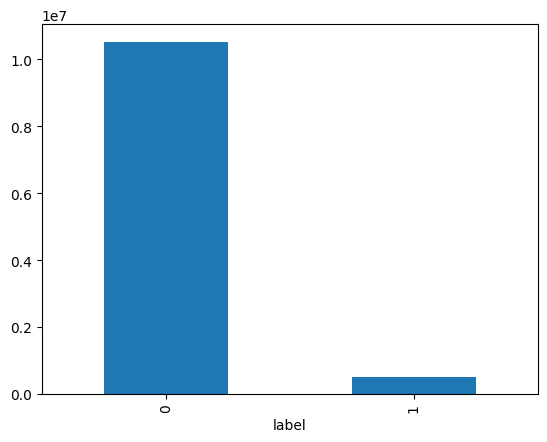

In [36]:
# View distribution of labels 
merged_data['label'].value_counts().plot(kind='bar')

The data is highly imbalanced. given the large size of the data, we may consider to perform undersampling to truncate the label 0 to handle the imbalanced dataset. 

       transcript_position  -1_flank_length  -1_flank_std  -1_flank_mean  \
count         3.657834e+06     3.657834e+06  3.657834e+06   3.657834e+06   
mean          1.296137e+03     8.131585e-03  4.376302e+00   1.114238e+02   
std           1.141801e+03     5.431197e-03  2.582040e+00   1.176742e+01   
min           3.000000e+00     1.660000e-03  1.950000e-01   7.320000e+01   
25%           5.420000e+02     4.320000e-03  2.510000e+00   1.040000e+02   
50%           9.860000e+02     6.640000e-03  3.590000e+00   1.120000e+02   
75%           1.718000e+03     1.030000e-02  5.630000e+00   1.200000e+02   
max           1.873000e+04     1.140000e-01  1.960000e+02   1.530000e+02   

       central_length   central_std  central_mean  +1_flank_length  \
count    3.657834e+06  3.657834e+06  3.657834e+06     3.657834e+06   
mean     8.164083e-03  5.181313e+00  1.114944e+02     7.099685e-03   
std      5.313133e-03  2.991821e+00  1.291739e+01     4.401402e-03   
min      1.660000e-03  4.400000e-02

<Axes: xlabel='label'>

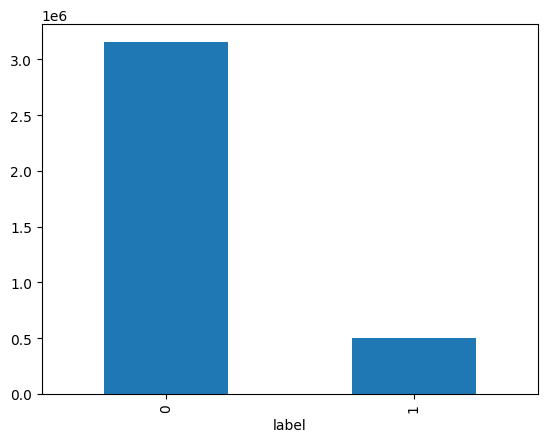

In [37]:
# Calculate the number of negative samples to remove (70% of total negatives)
num_negatives_to_remove = int(0.7 * len(merged_data[merged_data['label'] == 0]))

# Get the indices of negative samples
negative_indices = merged_data.index[merged_data['label'] == 0]

# Randomly select and remove 70% of the negative samples
indices_to_remove = np.random.choice(negative_indices, size=num_negatives_to_remove, replace=False)
df = merged_data.drop(indices_to_remove)

# Reset the index of the DataFrame (optional)
df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(df.describe())
df['label'].value_counts().plot(kind='bar')
